# Machine Learning Models

In [26]:
import pandas as pd
from textblob import TextBlob
url = 'https://raw.githubusercontent.com/grantaguinaldo/final-project/master/data/McClean.csv'
df = pd.read_csv(url, encoding='latin-1')

df['trim_text'] = ''
df['review_len'] = ''
df['sentiment_polarity'] = ''
df['sentiment_objectivity'] = ''

df.head()

,cleaned_review,rude,trim_text,review_len,sentiment_polarity,sentiment_objectivity
0,im not a huge mcds lover but ive been to bette...,1,,,,
1,terrible customer service came in at pm and ...,1,,,,
2,first they lost my order actually they gave it...,0,,,,
3,i see im not the only one giving star only be...,0,,,,
4,well its mcdonalds so you know what the food i...,1,,,,


In [29]:
except_list = []
for index, row in df.iterrows():
    try:
        df.set_value(index, 'trim_text', " ".join(row['cleaned_review'].split()))
        df.set_value(index, 'review_len', len(row['trim_text'].split(' ')))
        df.set_value(index, 'sentiment_polarity', TextBlob(row['trim_text']).sentiment.polarity)
        df.set_value(index, 'sentiment_objectivity', TextBlob(row['trim_text']).sentiment.subjectivity)
    except:
        except_list.append(row)
df.head()

,cleaned_review,rude,trim_text,review_len,sentiment_polarity,sentiment_objectivity
0,im not a huge mcds lover but ive been to bette...,1,im not a huge mcds lover but ive been to bette...,50,-0.328571,0.828571
1,terrible customer service came in at pm and ...,1,terrible customer service came in at pm and st...,80,-0.257143,0.521429
2,first they lost my order actually they gave it...,0,first they lost my order actually they gave it...,156,0.09375,0.529167
3,i see im not the only one giving star only be...,0,i see im not the only one giving star only bec...,22,0,1
4,well its mcdonalds so you know what the food i...,1,well its mcdonalds so you know what the food i...,143,-0.00936147,0.437175


In [30]:
df.drop('cleaned_review', axis=1, inplace=True)
df.to_csv('McClean.csv', index=False)
df.head()

,rude,trim_text,review_len,sentiment_polarity,sentiment_objectivity
0,1,im not a huge mcds lover but ive been to bette...,50,-0.328571,0.828571
1,1,terrible customer service came in at pm and st...,80,-0.257143,0.521429
2,0,first they lost my order actually they gave it...,156,0.09375,0.529167
3,0,i see im not the only one giving star only bec...,22,0,1
4,1,well its mcdonalds so you know what the food i...,143,-0.00936147,0.437175


## Naive_Bayes

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

nb = MultinomialNB()

min_df = 0.01
max_df = 0.95
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(1, 2))
X = df['trim_text']
y = df['rude']
X_dtm = vect.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.30, random_state=42)

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [1],
              'fit_prior': ['True','False']}
grid = GridSearchCV(nb, param_grid, verbose=3)

In [62]:
 # Fit the model using the grid search estimator. 
# This will take the Naive Bayes model and try each combination of parameters
grid.fit(X_train, y_train)

 # List the best score
print(grid.best_score_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] alpha=1, fit_prior=True .........................................
[CV]  alpha=1, fit_prior=True, score=0.7612359550561798, total=   0.0s
[CV] alpha=1, fit_prior=True .........................................
[CV]  alpha=1, fit_prior=True, score=0.7106741573033708, total=   0.0s
[CV] alpha=1, fit_prior=True .........................................
[CV]  alpha=1, fit_prior=True, score=0.7211267605633803, total=   0.0s
[CV] alpha=1, fit_prior=False ........................................
[CV]  alpha=1, fit_prior=False, score=0.7612359550561798, total=   0.0s
[CV] alpha=1, fit_prior=False ........................................
[CV]  alpha=1, fit_prior=False, score=0.7106741573033708, total=   0.0s
[CV] alpha=1, fit_prior=False ........................................
[CV]  alpha=1, fit_prior=False, score=0.7211267605633803, total=   0.0s
0.7310215557638238


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished


In [63]:
# List the best parameters for this dataset
print(grid.best_params_)

{'alpha': 1, 'fit_prior': 'True'}


In [64]:
 # Make predictions with the hypertuned model
predictions = grid.predict(X_test)

 # Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["not rude", "rude"]))

             precision    recall  f1-score   support

   not rude       0.85      0.82      0.84       308
       rude       0.66      0.71      0.68       150

avg / total       0.79      0.78      0.79       458



## Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
import numpy as np

lg = LogisticRegression()

min_df = 0.01
max_df = 0.95
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(1, 2))
X = df['trim_text']
y = df['rude']
X_dtm = vect.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.30, random_state=42)

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

grid = GridSearchCV(lg, hyperparameters, verbose=3)

In [89]:
 # Fit the model using the grid search estimator. 
# This will take the Naive Bayes model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=1.0, penalty=l1, score=0.7471910112359551, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=1.0, penalty=l1, score=0.7865168539325843, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=1.0, penalty=l1, score=0.7661971830985915, total=   0.0s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.7331460674157303, total=   0.0s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.7752808988764045, total=   0.0s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.7492957746478873, total=   0.0s
[CV] C=2.7825594022071245, penalty=l1 ................................
[CV]  C=2.782559

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=7.742636826811269, penalty=l2 .................................
[CV]  C=7.742636826811269, penalty=l2, score=0.723943661971831, total=   0.0s
[CV] C=21.544346900318832, penalty=l1 ................................
[CV]  C=21.544346900318832, penalty=l1, score=0.6825842696629213, total=   0.0s
[CV] C=21.544346900318832, penalty=l1 ................................
[CV]  C=21.544346900318832, penalty=l1, score=0.7471910112359551, total=   0.0s
[CV] C=21.544346900318832, penalty=l1 ................................
[CV]  C=21.544346900318832, penalty=l1, score=0.7098591549295775, total=   0.0s
[CV] C=21.544346900318832, penalty=l2 ................................
[CV]  C=21.544346900318832, penalty=l2, score=0.6882022471910112, total=   0.0s
[CV] C=21.544346900318832, penalty=l2 ................................
[CV]  C=21.544346900318832, penalty=l2, score=0.7584269662921348, total=   0.0s
[CV] C=21.544346900318832, penalty=l2 ................................
[CV]  C=21.5443469003188

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [90]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 1.0, 'penalty': 'l1'}


In [91]:
# List the best score
print(grid.best_score_)

0.7666354264292409


In [92]:
 # Make predictions with the hypertuned model
predictions = grid.predict(X_test)

 # Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["not rude", "rude"]))

             precision    recall  f1-score   support

   not rude       0.80      0.86      0.83       308
       rude       0.66      0.57      0.61       150

avg / total       0.76      0.76      0.76       458



## KNN Model

In [39]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

min_df = 0.01
max_df = 0.95
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(1, 2))
X = df['trim_text']
y = df['rude']
X_dtm = vect.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.30, random_state=42)

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []


for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.664
k: 3, Train/Test Score: 0.814/0.677
k: 5, Train/Test Score: 0.749/0.707
k: 7, Train/Test Score: 0.732/0.710
k: 9, Train/Test Score: 0.711/0.697
k: 11, Train/Test Score: 0.706/0.692
k: 13, Train/Test Score: 0.702/0.699
k: 15, Train/Test Score: 0.698/0.697
k: 17, Train/Test Score: 0.694/0.699
k: 19, Train/Test Score: 0.690/0.694
k: 21, Train/Test Score: 0.689/0.688
k: 23, Train/Test Score: 0.689/0.690
k: 25, Train/Test Score: 0.686/0.688
k: 27, Train/Test Score: 0.685/0.686
k: 29, Train/Test Score: 0.686/0.688
k: 31, Train/Test Score: 0.685/0.686
k: 33, Train/Test Score: 0.683/0.683
k: 35, Train/Test Score: 0.683/0.688
k: 37, Train/Test Score: 0.682/0.688
k: 39, Train/Test Score: 0.681/0.686


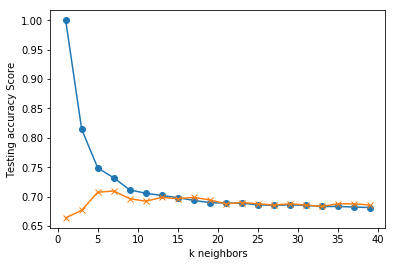

In [40]:
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show() 

In [41]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.699


## SVC Model

In [50]:
min_df = 0.01
max_df = 0.95
vect = CountVectorizer(stop_words='english', min_df=min_df, max_df=max_df, ngram_range=(1, 2))
X = df['trim_text']
y = df['rude']
X_dtm = vect.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.30, random_state=42)

In [51]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [52]:
 # Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.6657303370786517, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.7359550561797753, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.7154929577464789, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.6657303370786517, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.7359550561797753, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.7154929577464789, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.6657303370786517, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.7359550561797753, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.7154929577464789, total=   0.0s
[CV] C=1, gamma=0.005 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   10.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [47]:
 # List the best score
print(grid.best_score_)

0.7057169634489222


In [46]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


In [48]:
 # Make predictions with the hypertuned model
predictions = grid.predict(X_test)

 # Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["not rude", "rude"]))

             precision    recall  f1-score   support

   not rude       0.81      0.81      0.81       308
       rude       0.61      0.60      0.60       150

avg / total       0.74      0.74      0.74       458

